In [200]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [201]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [202]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [203]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## BMİ'nin dağılımı

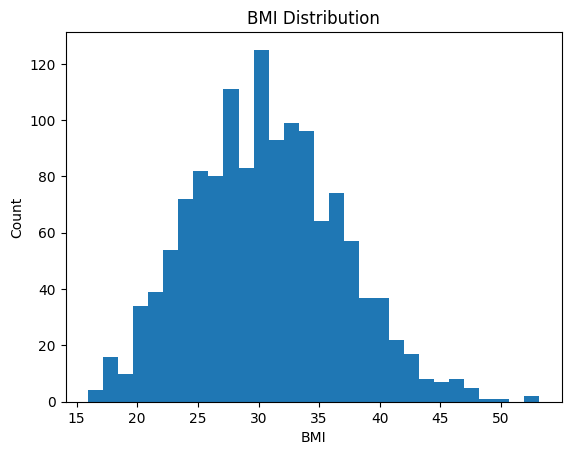

In [204]:
import matplotlib.pyplot as plt

plt.hist(df["bmi"], bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

## Smoker ile Charges arasındaki ilişki

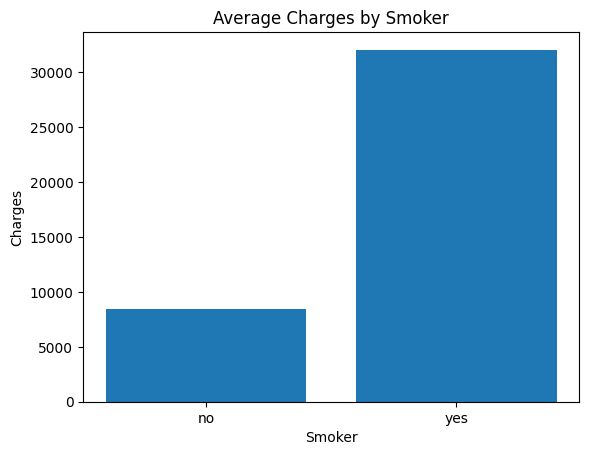

In [205]:
a = df['smoker'].value_counts()

atama = df.groupby('smoker')['charges'].mean()
plt.bar(atama.index, atama)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Average Charges by Smoker')
plt.show()

## Smoker ile Region arasındaki ilişki

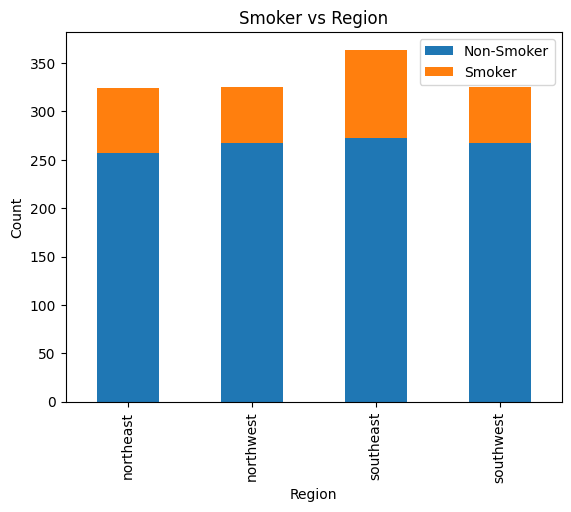

In [206]:
import matplotlib.pyplot as plt

smoker_regions = df.groupby(['region', 'smoker']).size().unstack()
smoker_regions.plot(kind='bar', stacked=True)

plt.title("Smoker vs Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(["Non-Smoker", "Smoker"])
plt.show()

## Cinsiyet ile bmi arasındaki ilişki

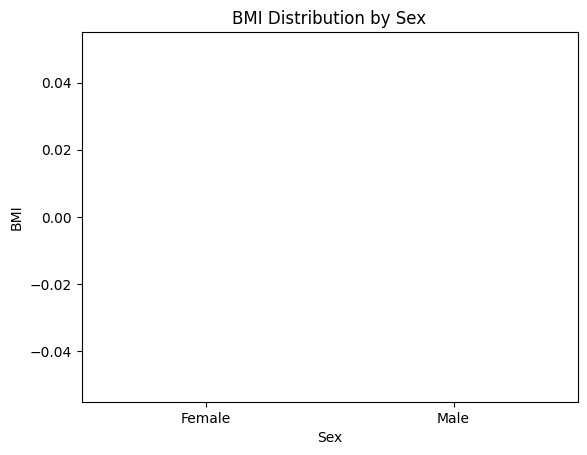

In [207]:
import matplotlib.pyplot as plt

plt.boxplot([df[df['sex'] == 0]['bmi'], df[df['sex'] == 1]['bmi']], labels=['Female', 'Male'])
plt.title("BMI Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

## En fazla "children" (çocuk) sahibi olan "region"i bulun.

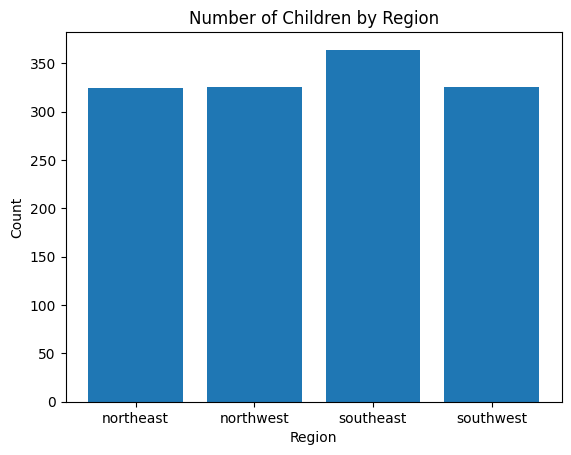

In [208]:
import matplotlib.pyplot as plt

grouped_df = df.groupby('region')['children'].size().reset_index()
plt.bar(grouped_df['region'], grouped_df['children'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Children by Region')
plt.show()

## Yaş ile Bmi arasındaki ilişki

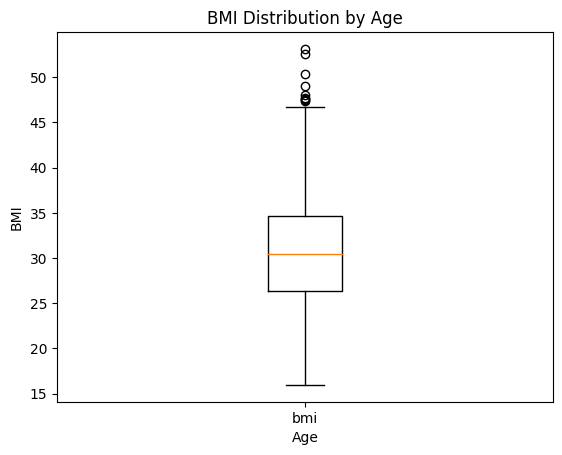

In [209]:
import matplotlib.pyplot as plt

plt.boxplot(df['bmi'], labels=['bmi'])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("BMI Distribution by Age")
plt.show()

## Yaşlara göre Sigara içenlerin bmi oranları

In [210]:
a = df[df['smoker'] == 'yes']
ab = a.groupby('age')['bmi'].mean().reset_index()
fig = px.bar(ab, x='age', y='bmi')
fig.show()

## Yaşlara göre sigara içmeyenlerin bmi oranları

In [211]:
v= df[df['smoker']=='no']
abc= v.groupby('age')['bmi'].mean().reset_index()
fig= px.bar(abc,x='age',y='bmi')
fig.show()

## Bmi ile Children ilişkisi

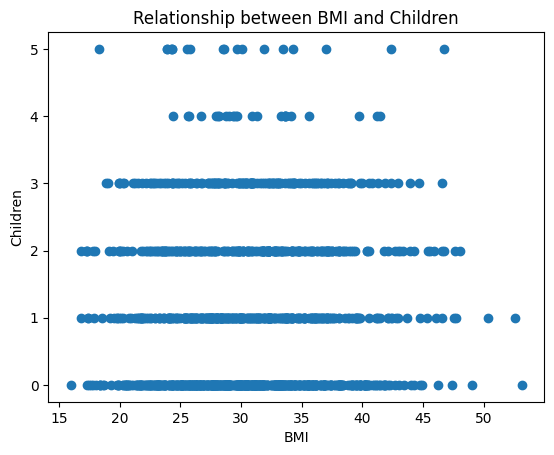

In [212]:
import matplotlib.pyplot as plt

plt.scatter(df['bmi'], df['children'])
plt.xlabel('BMI')
plt.ylabel('Children')
plt.title('Relationship between BMI and Children')
plt.show()

## Bmi değişkeninin dağılımı ve aykırı değerler

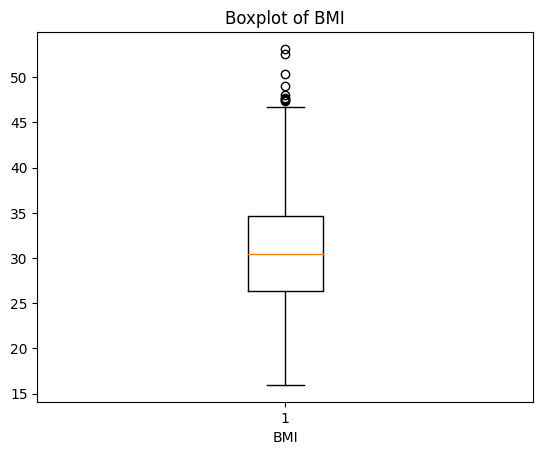

In [213]:
import matplotlib.pyplot as plt

plt.boxplot(df['bmi'])
plt.xlabel('BMI')
plt.title('Boxplot of BMI')
plt.show()

## Bmi ile Charges değişimi

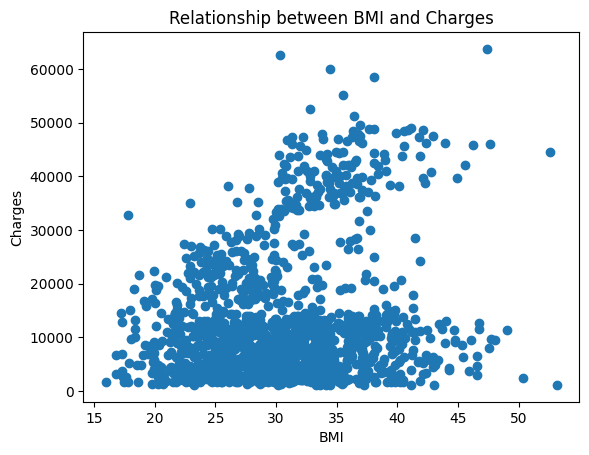

In [214]:
import matplotlib.pyplot as plt

plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.show()

## Region Smoker Bmi arasındaki ilişki

In [215]:


fig = px.bar(df, x="region", y="bmi", color="smoker", barmode="group")
fig.update_layout(xaxis_categoryorder='array', xaxis_categoryarray=['southwest', 'southeast', 'northwest', 'northeast'])
fig.show()

## Yaş ile Charge arasındaki ilişki

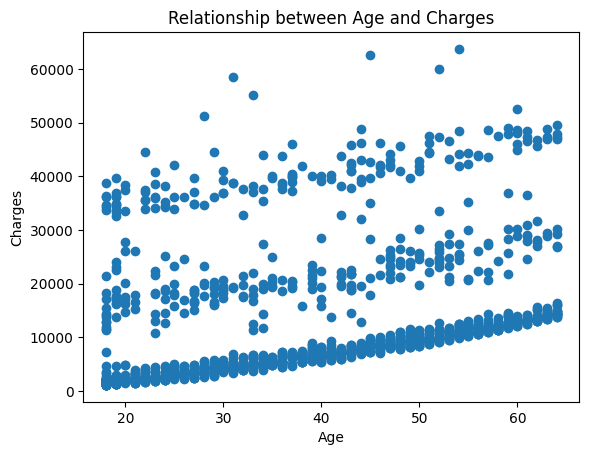

In [216]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

In [217]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [218]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [219]:
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


<AxesSubplot: >

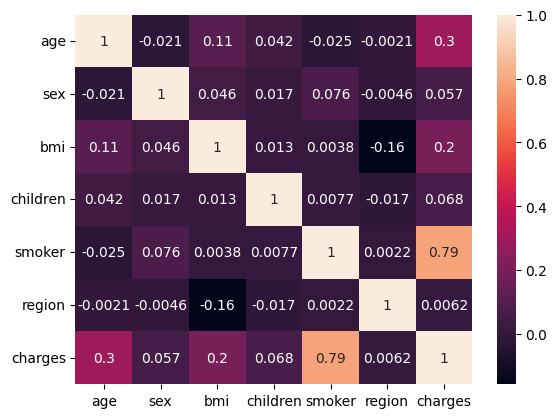

In [220]:


sns.heatmap(df.corr(), annot=True)

In [221]:

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# One-Hot Encoding for categorical variables
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
region_encoded = onehot_encoder.fit_transform(df[['region']])
region_encoded = pd.DataFrame(region_encoded, columns=['region_1', 'region_2', 'region_3'])

# Concatenate the encoded features with the numerical features
features = pd.concat([df[['age', 'sex', 'bmi', 'children', 'smoker']], region_encoded], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df['charges'], test_size=0.2, random_state=42)

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled, y_train, y_test

(array([[0.60869565, 0.        , 0.10734463, ..., 0.        , 1.        ,
         0.        ],
        [0.63043478, 0.        , 0.22491256, ..., 0.        , 0.        ,
         1.        ],
        [0.73913043, 0.        , 0.23944041, ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.86956522, 1.        , 0.24791499, ..., 0.        , 0.        ,
         1.        ],
        [0.41304348, 0.        , 0.85122411, ..., 0.        , 0.        ,
         0.        ],
        [0.80434783, 1.        , 0.37503363, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.58695652, 0.        , 0.24791499, ..., 0.        , 0.        ,
         1.        ],
        [0.39130435, 0.        , 0.37826204, ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.        , 0.29391983, ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.43478261, 1.        , 0.32458972, ..., 0.        , 0.        ,
         1.        ],
        [0.7

In [222]:
# Train and evaluate the models using cross-validation
results = {}
mae_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[model_name] = scores.mean()
    mae_results[model_name] = -mae_scores.mean()

# Select the model with the best performance
best_model = max(results, key=results.get)
print("Best Model:", best_model)

# Perform hyperparameter optimization for the best model
if best_model == 'Linear Regression':
    param_grid = {}
elif best_model == 'Ridge Regression':
    param_grid = {'alpha': [0.1, 1, 10]}
elif best_model == 'Lasso Regression':
    param_grid = {'alpha': [0.1, 1, 10]}
elif best_model == 'Random Forest Regression':
    param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

grid_search = GridSearchCV(models[best_model], param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Evaluate the optimized model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Optimized Model:", best_model)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Best Model: Random Forest Regression
Optimized Model: RandomForestRegressor(max_depth=5, n_estimators=200)
R2 Score: 0.8731517082095593
Mean Absolute Error: 2534.9219061858225
